## Exercises

In [1]:
# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import basic tools
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#### 1. What is the fundamental idea behind Support Vector Machines?
 
 找出不同样本之间的最大边距

#### 2. What is a support vector?

就是离分割线最近的点

#### 3. Why is it important to scale the inputs when using SVMs?

SVM的计算对于每个样本的大小比较敏感，如果样本之间的数值差距过大，会影响最终计算的精度

#### 4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

无法控制精确数值，因为只要样本落在分界线之外的地方，全部会判定为1。一定程度上可以有个概率来进行判定，就是距离分界线的距离。

#### 5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?

primal. 因为dual涉及矩阵运算，在样本较小的时候表现更好，但在大样本的情况下效率不高

#### 6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?

减少gamma，增加C

#### 7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?

不懂...

#### 8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

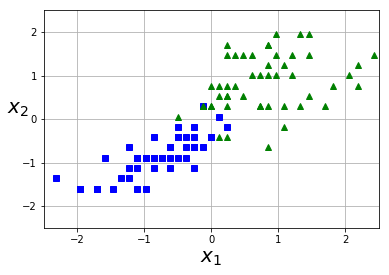

In [2]:

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # petal length, petal width
y = (iris['target'] == 2).astype(np.float64) # Iris-Virginica

# remove extra data
# print(X)
# print(np.shape(X))
to_delete = np.where(iris['target'] == 0)
# print('delete size:', np.shape(to_delete))
X = np.delete(X, to_delete, axis=0)
y = np.delete(y, to_delete, axis=0)
# print(np.shape(X))
# y = np.delete(y, to_delete);

# Scaler
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-2.5, 2.5, -2.5, 2.5])
plt.show()

In [63]:
def plot_svm_decision_line(reg, pattern='k--'):
    theta0 = reg.intercept_
    theta1 = reg.coef_[0][0]
    theta2 = reg.coef_[0][1]
    plt.plot([10, -theta2 / theta1 * 10 - theta0 / theta1],
             [-10, -theta2 / theta1 * -10 - theta0 / theta1], pattern)

In [71]:
linear_svc = LinearSVC()
linear_svc.fit(X, y)

default_svc = SVC(kernel='linear')
default_svc.fit(X, y)

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

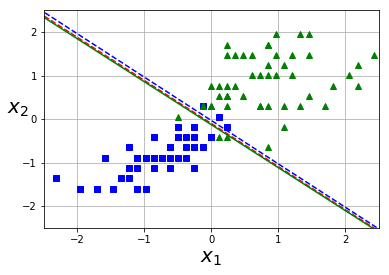

In [72]:
plot_dataset(X, y, [-2.5, 2.5, -2.5, 2.5])
plot_svm_decision_line(linear_svc, 'r--')
plot_svm_decision_line(default_svc, 'g-')
plot_svm_decision_line(sgd_classifier, 'b--')
plt.show()

结论：三个线性分类器的效果差别不是很大，只不过时间上可能需要重新统计一下

#### 9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the pro‐ cess. What accuracy can you reach?

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
# type(mnist): sklearn.utils.Bunch
X, y = mnist['data'], mnist['target']

# spilt test data
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

shuffle_index = np.random.permutation(60000)
X_train_small = X_train[shuffle_index[:1000]]
y_train_small = y_train[shuffle_index[:1000]]

In [4]:
from sklearn.model_selection import cross_val_score
mnist_svc = SVC()
cross_val_score(mnist_svc, X_train_small, y_train_small, cv=5, scoring="accuracy", n_jobs=-1)

# mnist_svc.fit(X, y)

array([0.1182266 , 0.11940299, 0.195     , 0.11557789, 0.11675127])

#### 10. Train an SVM regressor on the California housing dataset.